In [3]:
#!/bin/bash
!kaggle datasets download vishakhdapat/imdb-movie-reviews
!curl -L -o ~/Downloads/imdb-movie-reviews.zip\https://www.kaggle.com/api/v1/datasets/download/vishakhdapat/imdb-movie-reviews

zsh:1: command not found: kaggle
curl: (2) no URL specified
curl: try 'curl --help' for more information


In [4]:
import os
import zipfile

#file path
zip_path="imdb-movie-reviews.zip"

#extract the database
with zipfile.ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall("dataset")

#Extracted file
print(os.listdir("dataset"))


['IMDB Dataset.csv']


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("dataset/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.shape

(50000, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [10]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [11]:
df.duplicated().sum()

418

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(49582, 2)

In [14]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [15]:
positive_reviews=df[df['sentiment']=='positive']
negative_reviews=df[df['sentiment']=='negative']

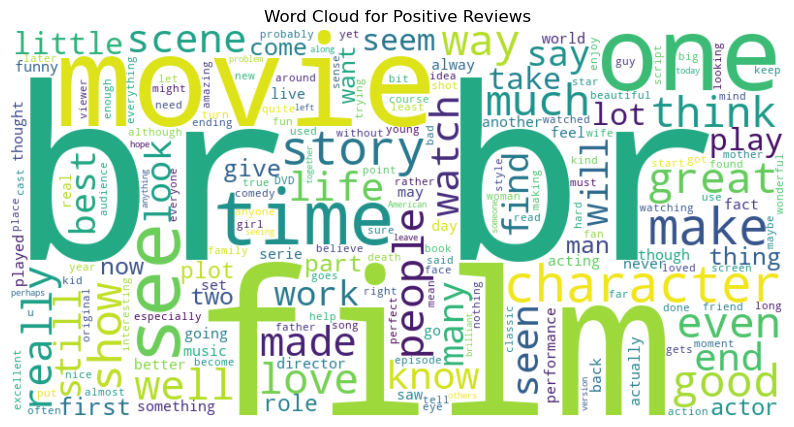

In [16]:
#To see frequency of words in positive

from wordcloud import WordCloud

positive_reviews = df[df['sentiment'] == 'positive']['review'].values
positive_reviews_text = ' '.join(positive_reviews)

plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

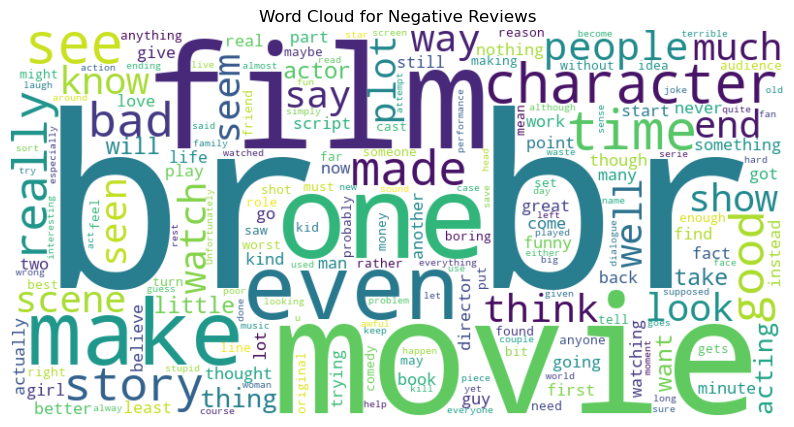

In [17]:
#To see frequency of words in negative reviews

from wordcloud import WordCloud

negative_reviews = df[df['sentiment'] == 'negative']['review'].values
negative_reviews_text = ' '.join(negative_reviews)

plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [18]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == "positive" else 0)


In [19]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [20]:
df['sentiment'].value_counts()

sentiment
1    24884
0    24698
Name: count, dtype: int64

In [21]:
#to remove html tags and punctuation marks
import re


def remove_html_tags(text):
    return re.sub(r'<.!*?>', '', text)

df['review']=df['review'].apply(remove_html_tags)


In [22]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


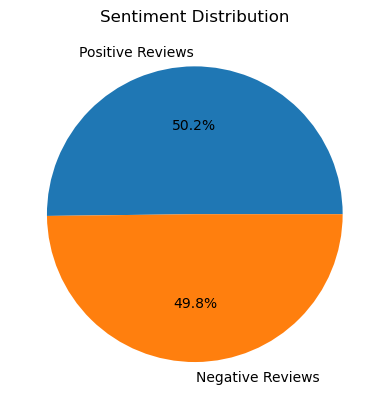

In [23]:
sentiment_count=df['sentiment'].value_counts()
plt.pie(sentiment_count,labels=['Positive Reviews','Negative Reviews'],autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

In [24]:
!pip install Tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 3.1 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.1/351.1 kB 7.0 MB/s eta 0:00:00a 0:00:01


In [25]:
!pip install keras

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , LSTM , Dense, Dropout

In [27]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
sequences=tokenizer.texts_to_sequences(df['review'])

In [28]:
maxlen=200
X=pad_sequences(sequences,maxlen=maxlen)
y=df['sentiment'].values

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
model=Sequential([
    Embedding(input_dim=10000,output_dim=128,input_length=maxlen),
    LSTM(128,return_sequences=False),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
#Train the model
LSTM_Model=model.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.2)


Epoch 1/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 89s 178ms/step - accuracy: 0.7183 - loss: 0.5219 - val_accuracy: 0.8593 - val_loss: 0.3347
Epoch 2/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 88s 177ms/step - accuracy: 0.9076 - loss: 0.2402 - val_accuracy: 0.8731 - val_loss: 0.3090
Epoch 3/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 86s 174ms/step - accuracy: 0.9319 - loss: 0.1832 - val_accuracy: 0.8558 - val_loss: 0.3399
Epoch 4/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 89s 179ms/step - accuracy: 0.9531 - loss: 0.1340 - val_accuracy: 0.8736 - val_loss: 0.3519
Epoch 5/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 89s 180ms/step - accuracy: 0.9660 - loss: 0.0983 - val_accuracy: 0.8721 - val_loss: 0.4056


In [32]:
X_train

array([[   0,    0,    0, ...,  346,  203,  133],
       [   0,    0,    0, ..., 4367,    2, 2750],
       [  28,  154,   77, ...,  413,   25,  195],
       ...,
       [   2,   24, 1696, ...,    3,  454,  156],
       [   0,    0,    0, ...,  103,  125, 7593],
       [   0,    0,    0, ...,    4,    1, 2904]], dtype=int32)

In [33]:
y_train

array([0, 0, 1, ..., 0, 1, 1])

In [34]:
X_test

array([[   0,    0,    0, ...,    7,  233,  156],
       [ 399,  908,  117, ...,   37,   11,   27],
       [   8,  978,  766, ...,    1, 3978, 2807],
       ...,
       [ 261,   21,   37, ...,    7,    7,    7],
       [   0,    0,    0, ...,    1,  306,  317],
       [   0,    0,    0, ...,   81,   14,  665]], dtype=int32)

In [35]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [36]:
#model Evaluation
loss,accuracy=model.evaluate(X_test,np.array(y_test))
print("Test Accuracy is ",accuracy)

310/310 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8729 - loss: 0.3782
Test Accuracy is  0.8740546703338623


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,235,141 (16.16 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,823,428 (10.77 MB)

In [38]:

def predict_sentiment():
    input_text = input("Enter Your Movie Review Here: ")

    sequence = tokenizer.texts_to_sequences([input_text])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)

    prediction = model.predict(padded_sequence)[0][0]

    if prediction > 0.5:
        sentiment = "Positive"
    else:
        sentiment = "Negative"

    print(f"Predicted Sentiment: {sentiment}")


In [ ]:
predict_sentiment()

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])


In [ ]:
import pickle

with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)



In [ ]:
with open('tokenizer.pkl', 'rb') as file:
    tokenizer = pickle.load(file)

print("Tokenizer loaded successfully!")


In [ ]:
from tensorflow.keras.models import load_model
model.save('lstm_model.keras')
loaded_model=load_model('lstm_model.keras')